In [1]:
import sys
import os
import pickle
sys.path.append("/root/autodl-tmp/HSPS/IFC/")
# pkl
path = '/root/autodl-tmp/HSPS/IFC/Checkpoints/Gurvan_operator/Multi-task/IFC_Opertor_N_10_Tprime_60.pkl'

In [ ]:
from Test.test import Test_method
t_method = Test_method(checkpoint_path= path,
                       task= [0,1,2,3])


/root/miniconda3/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


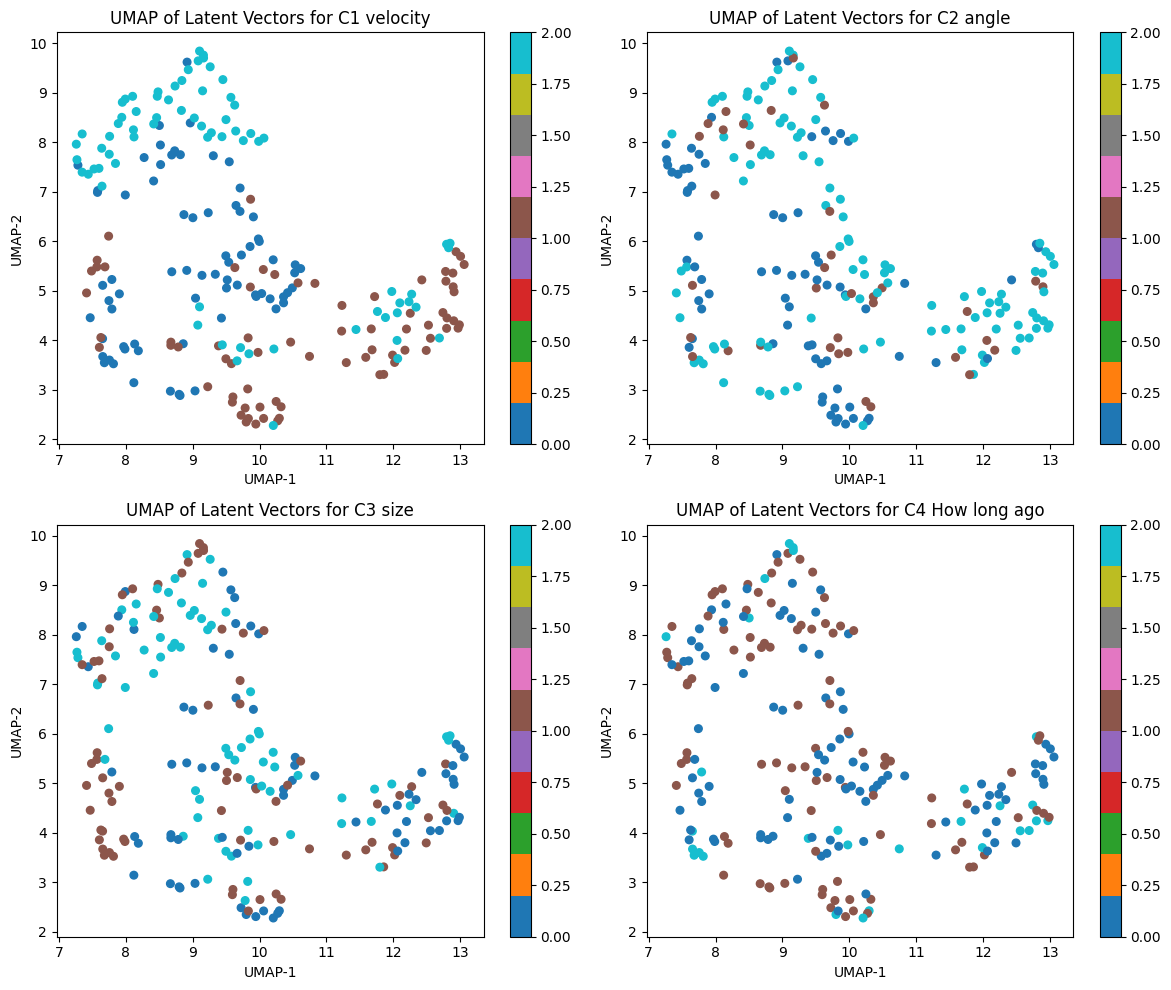

In [ ]:
all_latents = []
all_latent_labels = []

model = t_method.model
         
for data, conditions, label in t_method.loader:
   data = data.cuda()
   outputs = model(data)
   latent = model.latent  # [b, 10，512]
   latent_flat = latent.reshape(latent.shape[0], -1)  # [B, 512*T]
   for i in t_method.classifers:
      pass

   # 👇 收集 latent（合适位置写入，不要只在一个 classifier 内部收）
   all_latents.append(latent_flat.detach().cpu().numpy())           #
   all_latent_labels.append(label.detach().cpu().numpy())      # [B, num_classifiers]
import numpy as np
all_latents = np.concatenate(all_latents, axis=0)  # [N, 512*t]
all_latent_labels = np.concatenate(all_latent_labels, axis=0)  # [N, 4]

import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

# UMAP 降维--平均
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(all_latents)  # [N, 2] 

# 设置子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2行2列共4个子图
axes = axes.ravel()  # 展平为一维数组，方便索引

Classifer_name = ["velocity","angle","size","How long ago"]
# 分类器标签的列数 = 4
for i in range(4):
    ax = axes[i]
    labels = all_latent_labels[:, i]  # 第i个分类器对应的标签
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=30)
    ax.set_title(f"UMAP of Latent Vectors for C{i+1} {Classifer_name[i]}")
    ax.set_xlabel("UMAP-1")
    ax.set_ylabel("UMAP-2")
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


